In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bran import BrAn

In [2]:
%matplotlib widget

In [41]:
# For simplicity, this function produces stochastic block models where the communities are all the same size
def directed_stochastic_block_model(num_nodes, communities, probabilities=None):
    # Check that the input is sensible
    if id(probabilities) == id(None):
        probabilities = np.zeros((communities, communities))
        for i in range(communities):
            for j in range(communities):
                probabilities[i,j] = np.random.random()
    elif communities != probabilities.shape[0]:
        raise ValueError("The number of communities must be equal to the number of rows in the probability matrix.")
    
    # Initialize the output
    adjacency_matrix = np.zeros((num_nodes, num_nodes))
    
    # Generate a random list of nodes in the unit interval
    nodes = np.sort( [np.random.random() for i in range(num_nodes)] )

    # Find the community of each node
    community_array = np.zeros((num_nodes,), dtype=int)
    for i in range(num_nodes):
        if nodes[i] == 0:
            community_array[i] = 0
            continue
        community_array[i] = int(np.ceil(communities*nodes[i])) - 1
    
    # Populate the output
    for i in range(num_nodes):
        for j in range(num_nodes):
            community_i = community_array[i]
            community_j = community_array[j]
            prob = probabilities[ community_i, community_j ]
            adjacency_matrix[i,j] = np.random.choice([0,1], p=[ 1-prob, prob ])
    
    return adjacency_matrix

48


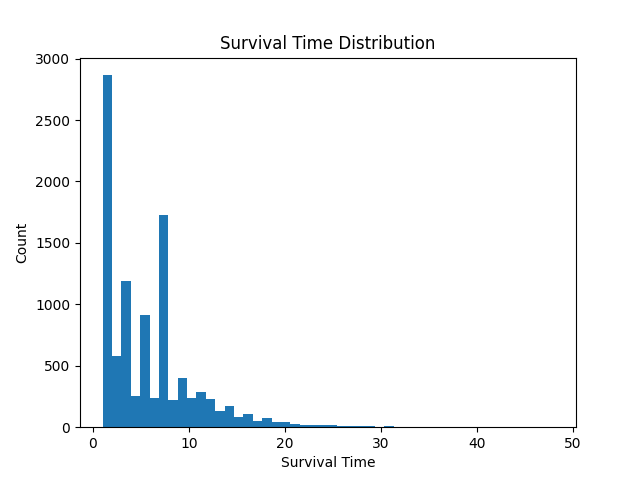

5.5266
4.995567279098541


Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


In [42]:
num_nodes = 10
communities = 2
probabilities = np.array([[0.8219707853396334, 0.5373953548045459],[0.33792244874347577, 0.30126906420823796]])
A = directed_stochastic_block_model(num_nodes=num_nodes, communities=communities, probabilities=probabilities)

p=0.05
Alpha = 10000

bran_instance = BrAn(A, p, Alpha)
survival_times = bran_instance.simulate()
survival_array = np.array( [survival_times[alpha] for alpha in survival_times.keys()] )
max_survival = np.max(survival_array)
print(max_survival)

plt.figure()
plt.hist(survival_array, bins=max_survival)
plt.xlabel("Survival Time")
plt.ylabel("Count")
plt.title("Survival Time Distribution")
plt.show()

print(np.mean(survival_array))
print(np.std(survival_array))

For now, we are considering a stochstic block model with 2 communities of equal size, whose probabilities are given by 
$$\begin{bmatrix} 0.8219707853396334 & 0.5373953548045459 \\ 0.33792244874347577 & 0.30126906420823796 \end{bmatrix}.$$

For a network of 10 nodes, with 10,000 messages tracked, we see that the mean survival time is 5.5266 and the standard deviation is 4.9956. The distribution is skewed to the right.

Let's try 100 nodes.

12


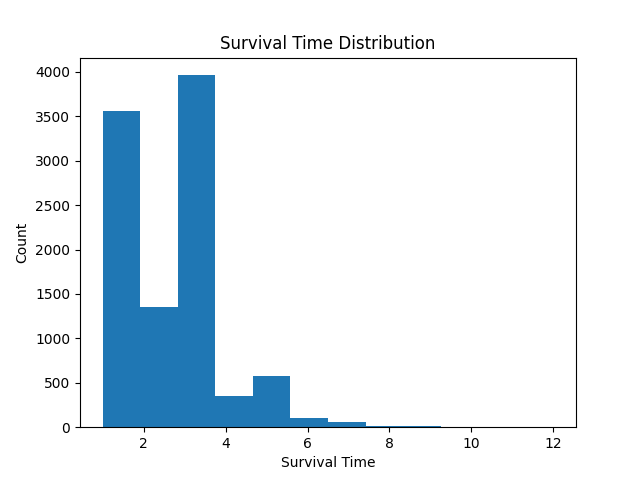

2.3764
1.3152653876689677


In [43]:
num_nodes = 100
communities = 2
probabilities = np.array([[0.8219707853396334, 0.5373953548045459],[0.33792244874347577, 0.30126906420823796]])
A = directed_stochastic_block_model(num_nodes=num_nodes, communities=communities, probabilities=probabilities)

p=0.05
Alpha = 10000

bran_instance = BrAn(A, p, Alpha)
survival_times = bran_instance.simulate()
survival_array = np.array( [survival_times[alpha] for alpha in survival_times.keys()] )
max_survival = np.max(survival_array)
print(max_survival)

plt.figure()
plt.hist(survival_array, bins=max_survival)
plt.xlabel("Survival Time")
plt.ylabel("Count")
plt.title("Survival Time Distribution")
plt.show()

print(np.mean(survival_array))
print(np.std(survival_array))

For a network of 100 nodes, with 10,000 messages tracked, we see that the mean survival time is 2.3764 and the standard deviation is 1.3153. The distribution is skewed to the right, though notably less so than when there were 10 nodes. The simulation took 55.6 seconds.

Let's try 1000 nodes.

2


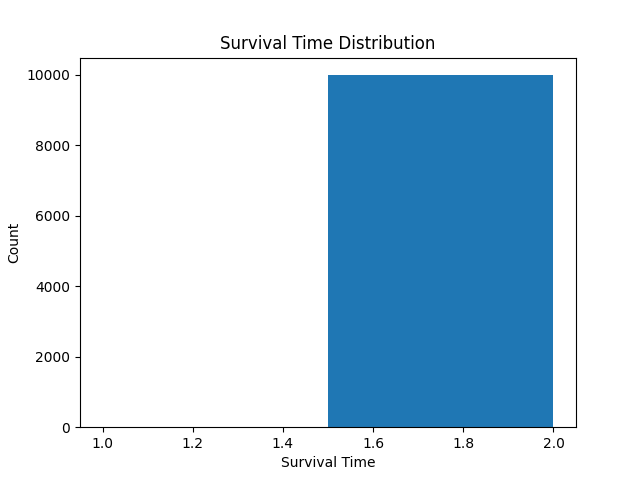

1.9991
0.029986496961132352


In [45]:
num_nodes = 1000
communities = 2
probabilities = np.array([[0.8219707853396334, 0.5373953548045459],[0.33792244874347577, 0.30126906420823796]])
A = directed_stochastic_block_model(num_nodes=num_nodes, communities=communities, probabilities=probabilities)

p=0.05
Alpha = 10000

bran_instance = BrAn(A, p, Alpha)
survival_times = bran_instance.simulate()
survival_array = np.array( [survival_times[alpha] for alpha in survival_times.keys()] )
max_survival = np.max(survival_array)
print(max_survival)

plt.figure()
plt.hist(survival_array, bins=max_survival)
plt.xlabel("Survival Time")
plt.ylabel("Count")
plt.title("Survival Time Distribution")
plt.show()

print(np.mean(survival_array))
print(np.std(survival_array))

For a network of 1000 nodes, with 10,000 messages tracked, we see that the mean survival time is 1.9991 and the standard deviation is 0.02999. The simulation took 8 minutes and 9.6 seconds. I am curious as to if this is significantly different from the result for the Erdos-Renyi network of 1000 nodes.

The simulation took 8 minutes and 9.6 seconds.

For the Erdos-Renyi network of 1000 nodes with probability 0.5, we had $n_1 = 10,000, \hat{\mu_1} = 1.9999,$ and $\hat{\sigma_1} = 0.009999.$

For the stochastic block model of 1000 nodes and the probability matrix given above, we had $n_2 = 10,000, \hat{\mu_2} = 1.9991,$ and $\hat{\sigma_2} = 0.029986.$

What is the p-value of this result?

EDIT: I just realized that you can't justify an independent means test for this because the populations likely have different variances. So I'd have to learn another approach to testing the hypothesis of equal means in this case.

In the mean time, let's look at the same block model but with a smaller injection probability


5


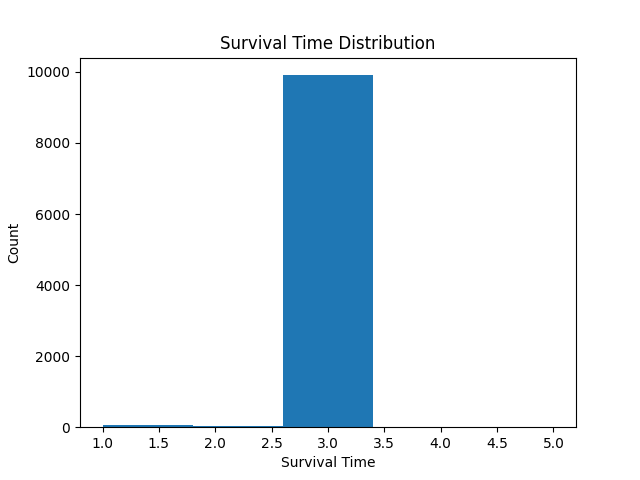

2.9858
0.1599948749179173


In [46]:
num_nodes = 1000
communities = 2
probabilities = np.array([[0.8219707853396334, 0.5373953548045459],[0.33792244874347577, 0.30126906420823796]])
A = directed_stochastic_block_model(num_nodes=num_nodes, communities=communities, probabilities=probabilities)

p=0.005
Alpha = 10000

bran_instance = BrAn(A, p, Alpha)
survival_times = bran_instance.simulate()
survival_array = np.array( [survival_times[alpha] for alpha in survival_times.keys()] )
max_survival = np.max(survival_array)
print(max_survival)

plt.figure()
plt.hist(survival_array, bins=max_survival)
plt.xlabel("Survival Time")
plt.ylabel("Count")
plt.title("Survival Time Distribution")
plt.show()

print(np.mean(survival_array))
print(np.std(survival_array))

Now, for this simulation, we had the same stochastic block model, we sampled a network of 1,000 nodes, and we tracked 10,000 messages. The difference is that we set the injection probability to 0.005, which means that the probability of having injection vectors of heavy load was very small. We see that the mean survival time was 2.9858 time steps and the standard deviation was 0.15999 time steps. The distribution is slightly skewed to the left. The simulation took 12 minutes and 35.1 seconds.

Let's look over all the evidence we've collected so far. 

We looked at two different graph models, an Erdos-Renyi graph and a stochastic block model. Both of these give rise to dense graphs in the large n limit. We sampled a graph of 1000 nodes from each model, and recorded the survival times of 10,000 different messages on each one. Also, importantly, the injection probability in these simulations were both 0.05. What we found is that the mean survival times were approximately equal to 2 time steps, while the standard deviations of the survival times were different. (This is observational; we have not done any statistical tests to confirm this).

Then, we did another test on that stochastic block model, with a different graph, and with the injection probability equal to 0.005. The mean survival time was now approximately 3 time steps.

I have a gut feeling that the injection probability has more influence on the survival time than the network structure. As a final activity on this project for today (and before we go looking at sparse graphs, where the results may be different), let's do a simulation on an ER(1/2) network with 10,000 messages and injection probability equal to 0.005. I'm guessing that the expected survival time will be approximately 3 time steps.

6


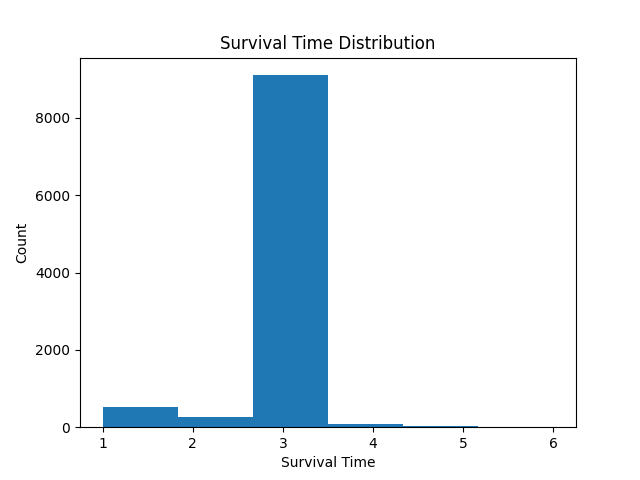

2.8855
0.49738290079173414


In [47]:
n = 1000
A = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i,j] = np.random.choice([0,1])

p = 0.005
Alpha = 10000

bran_instance = BrAn(A, p, Alpha)
survival_times = bran_instance.simulate()
survival_array = np.array( [survival_times[alpha] for alpha in survival_times.keys()] )
max_survival = np.max(survival_array)
print(max_survival)

plt.figure()
plt.hist(survival_array, bins=max_survival)
plt.xlabel("Survival Time")
plt.ylabel("Count")
plt.title("Survival Time Distribution")
plt.show()

print(np.mean(survival_array))
print(np.std(survival_array))

Oh, this is actually a little different. The mean survival time was 2.8855, which, given that we took 10,000 samples, is likely significantly different from the value for the stochastic block model. The standard deviations are definitely different, as this simulation has a standard deviation of around 0.49738, whereas the last one had a standard deviation of 0.15999.

So I change my conjecture to this: As the injection probability $p \rightarrow 0,$ the effect of the network structure on survival time dominates the effect of the injections. Thus, for future simulations, we should choose p to be very small.

Just so we have some indication as to how small p is, let's estimate the probability of a node having load >= 20%. Using the normal approximation to the binomial distribution, we get that, if $n \geq 1000$ and $p \leq 0.0530303,$ then the probability of the injection vector having a load of at least $\geq 20\%$ is less than $3.375\times 10^{-95}.$ In fact, for these same settings of $n$ and $p$, the probability of the load being at least $5\%$ is less than $8.597\times 10^{-83},$ and the probability of the load being at least $1\%$ is less than $0.03382.$ In other words, when we set p this low, we're really injecting a small number of messages relative to the size of the graph, less than $1\%$ pretty much. With the injections this low, we should really expect the effect of network structure to dominate the effect of injections on survival times.